## Data Preparation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('medical_appointment_noshow.csv')
df.sample(10)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
13034,3.269136e+11,5668515,F,2016-05-06T09:14:11Z,2016-05-06T00:00:00Z,45,ILHA DE SANTA MARIA,0,0,0,0,0,0,No
66207,6.816666e+11,5582388,F,2016-04-14T09:20:20Z,2016-05-02T00:00:00Z,16,JARDIM CAMBURI,0,0,0,0,0,1,Yes
70629,3.957823e+12,5604301,M,2016-04-20T07:51:24Z,2016-05-04T00:00:00Z,76,PRAIA DO CANTO,0,1,0,0,0,1,Yes
43991,8.675398e+12,5684372,M,2016-05-11T08:32:17Z,2016-05-11T00:00:00Z,0,GURIGICA,0,0,0,0,0,0,No
41773,8.718894e+14,5668378,F,2016-05-06T08:57:10Z,2016-05-11T00:00:00Z,55,SANTO ANTÔNIO,0,0,0,0,0,1,Yes
20849,1.599695e+13,5669282,F,2016-05-06T10:37:59Z,2016-05-10T00:00:00Z,50,JABOUR,0,0,0,0,0,1,No
19670,7.821453e+14,5741794,M,2016-05-30T07:26:06Z,2016-05-30T00:00:00Z,46,BELA VISTA,1,1,0,1,0,0,No
35553,8.549233e+13,5635469,F,2016-04-28T13:32:26Z,2016-05-19T00:00:00Z,41,JESUS DE NAZARETH,0,0,0,0,0,0,Yes
9152,7.957837e+12,5723656,F,2016-05-20T08:28:38Z,2016-05-20T00:00:00Z,84,BELA VISTA,0,1,0,0,0,0,No
58977,7.113874e+13,5675650,M,2016-05-09T14:07:21Z,2016-05-10T00:00:00Z,56,CENTRO,0,1,0,0,0,0,No


In [7]:
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

In [12]:
df['OUTPUT_LABEL'] = (df['No-show'] == 'Yes').astype('int')
df.sample(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,OUTPUT_LABEL
58518,3.429756e+11,5606945,M,2016-04-20T10:53:51Z,2016-05-19T00:00:00Z,17,SÃO CRISTÓVÃO,0,0,0,0,0,0,Yes,1
71031,2.654993e+12,5412231,F,2016-03-01T08:25:52Z,2016-05-06T00:00:00Z,18,CENTRO,1,0,0,0,0,1,No,0
104948,7.816970e+13,5763550,M,2016-06-02T09:06:17Z,2016-06-02T00:00:00Z,40,SANTO ANDRÉ,0,0,0,0,0,0,No,0
8235,8.767623e+12,5683374,F,2016-05-11T07:28:10Z,2016-05-13T00:00:00Z,23,JARDIM DA PENHA,0,0,0,0,0,0,No,0
100059,6.257739e+13,5755652,M,2016-06-01T07:33:59Z,2016-06-06T00:00:00Z,37,RESISTÊNCIA,0,0,0,0,0,0,No,0


#### We can check the prevalence of our OUTPUT_LABEL:

In [13]:
def calc_prevalence(y):
    return (sum(y)/len(y))

In [14]:
calc_prevalence(df.OUTPUT_LABEL.values)

0.20193255946510807

#### which means that 1 in 5 patients will miss their scheduled appointment.

In [15]:
df.AppointmentDay.head()

0    2016-04-29T00:00:00Z
1    2016-04-29T00:00:00Z
2    2016-04-29T00:00:00Z
3    2016-04-29T00:00:00Z
4    2016-04-29T00:00:00Z
Name: AppointmentDay, dtype: object

In [16]:
df.ScheduledDay.head()

0    2016-04-29T18:38:08Z
1    2016-04-29T16:08:27Z
2    2016-04-29T16:19:04Z
3    2016-04-29T17:29:31Z
4    2016-04-29T16:07:23Z
Name: ScheduledDay, dtype: object

#### The dtype for both columns is object which means pandas currently views these values as strings
#### we will convert it into datetime format

In [18]:
df["ScheduledDay"] = pd.to_datetime(df["ScheduledDay"], 
 format = "%Y-%m-%dT%H:%M:%SZ", 
 errors = "coerce")


df["AppointmentDay"] = pd.to_datetime(df["AppointmentDay"], 
 format = "%Y-%m-%dT%H:%M:%SZ", 
 errors = "coerce")

In [21]:
assert df.ScheduledDay.isnull().sum() == 0, "missing ScheduledDay dates"
assert df.AppointmentDay.isnull().sum() == 0, "missing AppointmentDay dates"

In [22]:
df.ScheduledDay.head()

0   2016-04-29 18:38:08
1   2016-04-29 16:08:27
2   2016-04-29 16:19:04
3   2016-04-29 17:29:31
4   2016-04-29 16:07:23
Name: ScheduledDay, dtype: datetime64[ns]

In [24]:
(df['ScheduledDay'] > df['AppointmentDay']).sum()

38568

#### currently there are ~40k appointments that were scheduled after the appointment datetime

#### This may be due to the fact that all the appointment times were set at the earliest time (00:00:00) whereas the times are included in ScheduledDay. To adjust for this, lets just shift all the appointment times to the end of the day

In [27]:
df["AppointmentDay"] = df["AppointmentDay"] + pd.Timedelta("1d") - pd.Timedelta("1s")
(df['ScheduledDay'] > df['AppointmentDay']).sum()

1

##### With this change there is only 1 rows where scheduledDay time is after appointmentDay. Let’s just drop those rows

In [28]:
df = df.loc[(df['ScheduledDay'] <= df['AppointmentDay'])].copy()
df.sample(7)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,OUTPUT_LABEL
32703,1.171573e+13,5615194,F,2016-04-25 11:50:23,2016-05-11 23:59:58,21,PRAIA DO SUÁ,0,0,0,0,0,1,Yes,1
87669,2.114432e+14,5777272,F,2016-06-06 13:29:47,2016-06-07 23:59:58,48,JOANA D´ARC,0,0,1,0,0,0,No,0
100873,3.414495e+13,5755250,F,2016-06-01 07:14:06,2016-06-04 23:59:58,50,JARDIM CAMBURI,0,0,0,0,0,0,No,0
66990,4.572634e+11,5632800,M,2016-04-28 08:26:33,2016-05-07 23:59:58,61,JARDIM CAMBURI,0,0,0,0,0,0,No,0
17704,9.924258e+12,5738512,F,2016-05-25 11:06:48,2016-06-01 23:59:58,38,CARATOÍRA,0,0,0,0,0,0,No,0
69349,1.161425e+14,5643840,F,2016-05-02 07:57:33,2016-05-13 23:59:58,18,SÃO CRISTÓVÃO,0,0,0,0,0,1,No,0
13901,4.736778e+13,5735369,F,2016-05-25 07:05:28,2016-06-01 23:59:58,1,CRUZAMENTO,0,0,0,0,0,1,Yes,1


#### We can break apart the date and get the year, month, week of year, day of month, hour, minute, second, etc. You can also get the day of the week (Monday = 0, Sunday = 6)

In [29]:
df["ScheduledDay_year"] = df["ScheduledDay"].dt.year
df["ScheduledDay_month"] = df["ScheduledDay"].dt.month
df["ScheduledDay_week"] = df["ScheduledDay"].dt.week
df["ScheduledDay_day"] = df["ScheduledDay"].dt.day
df["ScheduledDay_hour"] = df["ScheduledDay"].dt.hour
df["ScheduledDay_minute"] = df["ScheduledDay"].dt.minute
df["ScheduledDay_dayofweek"] = df["ScheduledDay"].dt.dayofweek
df["AppointmentDay_year"] = df["AppointmentDay"].dt.year
df["AppointmentDay_month"] = df["AppointmentDay"].dt.month
df["AppointmentDay_week"] = df["AppointmentDay"].dt.week
df["AppointmentDay_day"] = df["AppointmentDay"].dt.day
df["AppointmentDay_hour"] = df["AppointmentDay"].dt.hour
df["AppointmentDay_minute"] = df["AppointmentDay"].dt.minute
df["AppointmentDay_dayofweek"] = df["AppointmentDay"].dt.dayofweek

<ipython-input-29-7f5130ff623e>:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["ScheduledDay_week"] = df["ScheduledDay"].dt.week
<ipython-input-29-7f5130ff623e>:10: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df["AppointmentDay_week"] = df["AppointmentDay"].dt.week


In [31]:
df.groupby('AppointmentDay_year').size()

AppointmentDay_year
2016    110526
dtype: int64

In [32]:
df.groupby('AppointmentDay_month').size()

AppointmentDay_month
4     3235
5    76561
6    30730
dtype: int64

In [33]:
df.groupby('AppointmentDay_week').size()

AppointmentDay_week
17     3235
18    20951
19    21722
20    21456
21     7918
22    21657
23    13587
dtype: int64

In [35]:
df.groupby('AppointmentDay_week').apply(lambda x: calc_prevalence(x.OUTPUT_LABEL.values))

AppointmentDay_week
17    0.195672
18    0.203618
19    0.213931
20    0.217422
21    0.198282
22    0.188115
23    0.181276
dtype: float64

#### Looks like more people skip their appointments on Friday and Saturday, although the effect is modest

#### Let’s create a new feature that is the number of days between the scheduled date and the appointment date.

In [36]:
df["delta_days"] = (df["AppointmentDay"]-df["ScheduledDay"]).dt.total_seconds()/(60*60*24)

AttributeError: 'Rectangle' object has no property 'normed'

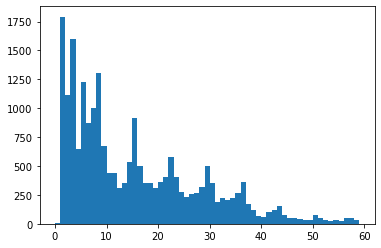

In [41]:
plt.hist(df.loc[df.OUTPUT_LABEL == 1,"delta_days"], 
 label = "Missed",bins = range(0,60,1), normed = True)
plt.hist(df.loc[df.OUTPUT_LABEL == 0,"delta_days"], 
 label = "Not Missed",bins = range(0,60,1), normed = True,alpha =0.5)
plt.legend()
plt.xlabel("days until appointment")
plt.ylabel("normed distribution")
plt.xlim(0,40)
plt.show()

## Split Samples
#### We willl split into two datasets: train (70%) and validation (30%). It is important to shuffle your samples because you may have been given the data in order of dates

In [42]:
# shuffle the samples
df = df.sample(n = len(df), random_state = 42)
df = df.reset_index(drop = True)
df_valid = df.sample(frac = 0.3, random_state = 42)
df_train = df.drop(df_valid.index)

In [44]:
print("Valid prevalence(n = %d):%.3f"%(len(df_valid),calc_prevalence(df_valid.OUTPUT_LABEL.values)))
print("Train prevalence(n = %d):%.3f"%(len(df_train), calc_prevalence(df_train.OUTPUT_LABEL.values)))

Valid prevalence(n = 33158):0.201
Train prevalence(n = 77368):0.202


#### We can check the prevalence is about 20% in each:

In [45]:
col2use = ["ScheduledDay_day", "ScheduledDay_hour",
 "ScheduledDay_minute", "ScheduledDay_dayofweek", 
 "AppointmentDay_day",
 "AppointmentDay_dayofweek", "delta_days"]

In [48]:
X_train = df_train[col2use].values
X_valid = df_valid[col2use].values
y_train = df_train["OUTPUT_LABEL"].values
y_valid = df_valid["OUTPUT_LABEL"].values
print("Training shapes:",X_train.shape, y_train.shape)
print("Validation shapes:",X_valid.shape, y_valid.shape)

Training shapes: (77368, 7) (77368,)
Validation shapes: (33158, 7) (33158,)


## Train the model

In [56]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier(max_depth = 5, n_estimators=100, random_state = 42)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, random_state=42)

In [57]:
y_train_preds = rf.predict_proba(X_train)[:,1]
y_valid_preds = rf.predict_proba(X_valid)[:,1]

## Evaluate performance


In [58]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score

def calc_specificity(y_actual, y_pred, thresh):
 # calculates specificity
    return sum((y_pred < thresh) & (y_actual == 0)) /sum(y_actual ==0)

def print_report(y_actual, y_pred, thresh):
 
    auc = roc_auc_score(y_actual, y_pred)
    accuracy = accuracy_score(y_actual, (y_pred > thresh))
    recall = recall_score(y_actual, (y_pred > thresh))
    precision = precision_score(y_actual, (y_pred > thresh))
    specificity = calc_specificity(y_actual, y_pred, thresh)
    print("AUC:%.3f"%auc)
    print("accuracy:%.3f"%accuracy)
    print("recall:%.3f"%recall)
    print("precision:%.3f"%precision)
    print("specificity:%.3f"%specificity)
    print("prevalence:%.3f"%calc_prevalence(y_actual))
    print("  ")
    return auc, accuracy, recall, precision, specificity



In [60]:
thresh = 0.201

print("Training")
print_report(y_train,y_train_preds,thresh)

print("Validation")
print_report(y_valid,y_valid_preds,thresh)


Training
AUC:0.721
accuracy:0.523
recall:0.918
precision:0.287
specificity:0.423
prevalence:0.202
  
Validation
AUC:0.707
accuracy:0.516
recall:0.915
precision:0.283
specificity:0.415
prevalence:0.201
  


(0.7065442504915527,
 0.5158936003377768,
 0.9147565543071161,
 0.28282921858353793,
 0.4153607974927312)

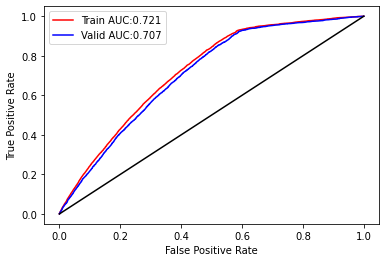

In [64]:
from sklearn.metrics import roc_curve

fpr_train, tpr_train, thresholds_train = roc_curve(y_train, y_train_preds)
auc_train = roc_auc_score(y_train, y_train_preds)
fpr_valid, tpr_valid, thresholds_valid = roc_curve(y_valid, y_valid_preds)
auc_valid = roc_auc_score(y_valid, y_valid_preds)


plt.plot(fpr_train, tpr_train, "r-",label ="Train AUC:%.3f"%auc_train)
plt.plot(fpr_valid, tpr_valid, "b-",label ="Valid AUC:%.3f"%auc_valid)
plt.plot([0,1],[0,1],"k")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

##### We can investigate this a bit by looking at the top features


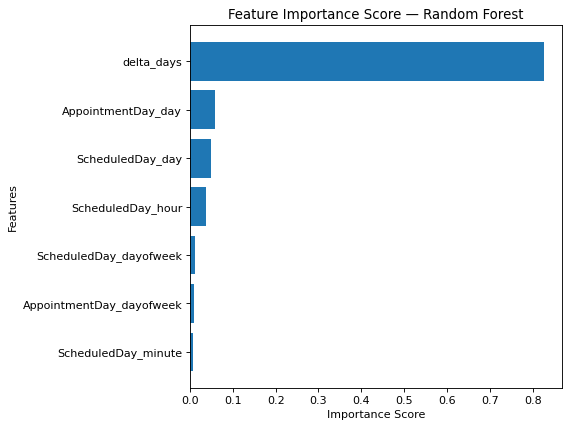

In [65]:
feature_importances = pd.DataFrame(rf.feature_importances_,
 index = col2use,
 columns=["importance"]).sort_values("importance",
 ascending=False)
num = min([50,len(col2use)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = feature_importances.iloc[:num].values.ravel()[::-1]
feature_labels = list(feature_importances.iloc[:num].index)[::-1]
plt.figure(num=None, figsize=(6, 6), dpi=80, facecolor="w", edgecolor="k");
plt.barh(ylocs, values_to_plot, align = "center")
plt.ylabel("Features")
plt.xlabel("Importance Score")
plt.title("Feature Importance Score — Random Forest")
plt.yticks(ylocs, feature_labels)
plt.show()